In [1]:
import numpy as np
import matplotlib.pylab as plt

In [17]:
n = 2
sqrtn = np.sqrt(n)
x = np.array([100_000]*n)
v = np.ones_like(x)/sqrtn
r = np.sqrt(x@x)
x/r

array([0.70710678, 0.70710678])

In [37]:
liq = np.array([100_000, 200_000, 100_000])
x_ = np.tile(liq, [n,1])
r_ = np.sqrt(np.sum(x_*x_, axis=0))

In [44]:
xt = x_.sum(axis=1)
rt = np.sqrt(xt@xt)
rt

np.float64(565685.4249492381)

In [119]:
deltap = np.array([1/100, 2/100, 3/100])
prices = 1 - deltap
k = sqrtn - (prices + n - 1)/(sqrtn * np.sqrt(prices**2 + n - 1))

(array([0.99, 0.98, 0.97]),
 array([0.01, 0.02, 0.03]),
 array([237150.10882119, 240000.        , 242864.46891264]),
 array([234321.71722788, 234343.43139913, 234380.15627542]),
 array([ 59287.5272053 , 120000.        ,  60716.11722816]),
 np.float64(565685.4249492381),
 array([0.41922613, 0.42426407, 0.42932778]),
 array([0.41421785, 0.41423072, 0.41425216]),
 array([0.41422619, 0.41426457, 0.41432949]))

In [106]:
alph = (1-1/sqrtn)

(np.float64(0.4143294947239238), np.float64(0.03000000371592948))

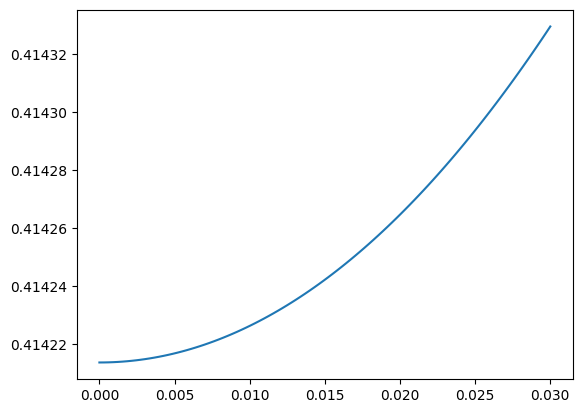

In [136]:
xx = np.linspace(alph-.0106849,alph, 100)
yy = 1 - np.sqrt(1 - (1 - xx)**2 )
# plt.plot(xx, 1 - np.sqrt(1 - (1 - xx)**2 ) )
price = (1-yy)/(1-xx)
plt.plot(1- price, (xx + yy)/sqrtn)
((xx + yy)/sqrtn)[0], (1-price)[0]

In [143]:
xt

array([400000, 400000])

In [150]:
import scipy.optimize

In [187]:
rint = xt[0]/alph
kbound = 0#xt@v
rint


np.float64(1365685.4249492376)

In [188]:
def f(x1, x0):
    xt = np.array([x0,x1[0]]).T
    return (xt@v - kbound - rint*sqrtn)**2 + ( np.sqrt((xt**2).sum() - (xt.sum()**2)/n) - 0 )**2 - rint**2

In [206]:
def f1(x1, x0):
    xt = np.array([x0,x1[0]]).T
    x2y2 = ((xt**2).sum() - (xt.sum()**2)/n)
    return (
        (
            (xt@v - kbound - rint*sqrtn)**2 + 
            x2y2 + 
            ( 0  )**2 - 
            rint**2
        )**2 
        - 4 * ( 0 ) * x2y2
    )

In [207]:
dx = -10000
x_ = xt[0] + dx
y_ = scipy.optimize.fsolve(f1, xt[0]-dx, args=(x_,))
(rint-y_)/(rint-x_), y_, np.array([x_, y_[0]])@v/rint

(array([0.97939434]), array([410104.64267052]), np.float64(0.4142677428897599))

In [166]:
xt

array([400000, 400000])

In [149]:
f(xt)

np.float64(0.0)

In [142]:
xt@v, xt - (xt@v)*v

(np.float64(565685.424949238), array([5.82076609e-11, 5.82076609e-11]))

In [138]:
xt@v/rt

np.float64(0.9999999999999998)

In [139]:
(n - 1)*np.sqrt(alpha)/(sqrtn * np.sqrt(alpha) + 1)

array([0.41421785, 0.41423072, 0.41425216])

In [140]:
x_.T@v

array([141421.35623731, 282842.71247462, 141421.35623731])

In [60]:
x_


array([[100000, 200000, 100000],
       [100000, 200000, 100000]])

In [61]:
v

array([0.70710678, 0.70710678])

In [47]:
xt

array([400000, 400000])

In [51]:
d = 100
(rt - xt[0]-d)/(rt - xt[1]+100)

np.float64(0.9987936213327484)